In [1]:
from PIL import Image, ImageDraw
import torch
import os
from torchvision import transforms

cuda


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [2]:
is_google_colab = False
if is_google_colab: 
    project_20_data_path = "drive/MyDrive/Colab Notebooks/dataset/project_20_data/"
else: 
    project_20_data_path = "project_20_data"

In [3]:
PATH = "saved_models/FullModel_BeerCans_1-epochs_6-minutes_20211121-203426.pth"

In [4]:
model = torch.load(PATH)
model.to(device)
print("Model loaded")

Model loaded


In [5]:
frame = "frame_002008"
image_path = os.path.join(project_20_data_path,"video1/video_frames/"+frame+".PNG")
example_image = Image.open(image_path)

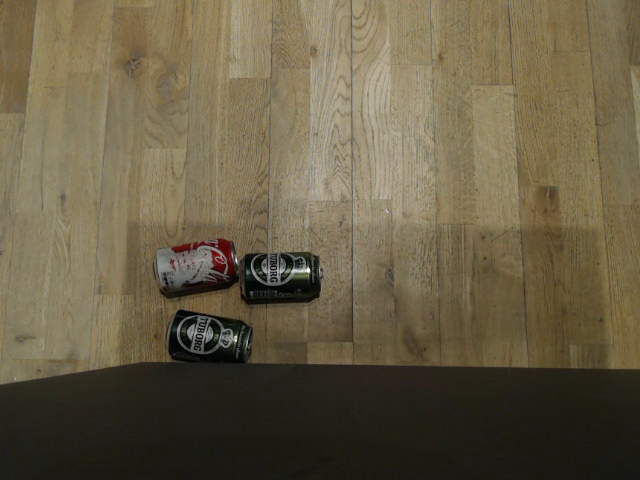

In [6]:
example_image

In [7]:
img = Image.open(image_path).convert("RGB")
convert_tensor = transforms.ToTensor()
img = convert_tensor(img)
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

/home/steven/anaconda3/envs/deep_learning/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
img

tensor([[[0.3961, 0.4078, 0.4000,  ..., 0.3922, 0.4118, 0.3922],
         [0.4039, 0.3490, 0.3451,  ..., 0.3961, 0.4118, 0.4000],
         [0.4078, 0.3294, 0.3490,  ..., 0.3922, 0.4078, 0.4000],
         ...,
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902]],

        [[0.3490, 0.3608, 0.3333,  ..., 0.3373, 0.3569, 0.3373],
         [0.3569, 0.3020, 0.2784,  ..., 0.3412, 0.3569, 0.3451],
         [0.3412, 0.2627, 0.2824,  ..., 0.3373, 0.3529, 0.3451],
         ...,
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902],
         [0.1137, 0.1137, 0.1137,  ..., 0.0863, 0.0902, 0.0902]],

        [[0.2392, 0.2510, 0.2392,  ..., 0.2235, 0.2431, 0.2235],
         [0.2471, 0.1922, 0.1843,  ..., 0.2275, 0.2431, 0.2314],
         [0.2392, 0.1608, 0.1647,  ..., 0.2235, 0.2392, 0.

In [9]:
prediction

[{'boxes': tensor([[160.3172, 311.2451, 255.1171, 367.0859],
          [236.6980, 248.3675, 325.0599, 309.9768],
          [142.7450, 234.7757, 242.2929, 297.9066],
          [148.1673, 234.9902, 240.6900, 295.2941]], device='cuda:0'),
  'labels': tensor([2, 2, 1, 2], device='cuda:0'),
  'scores': tensor([0.9951, 0.9942, 0.9623, 0.2598], device='cuda:0')}]

In [10]:
# creating new Image object
color_map = ["","red","green"]

predicted_img = Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())
# create rectangle image
img1 = ImageDraw.Draw(predicted_img)  


for pred in prediction:
    boxes = pred["boxes"]
    labels = pred["labels"]
    index = 0
    for box in boxes: 
        shape = [(box[0], box[1]), (box[2], box[3])]
        img1.rectangle(shape, outline =color_map[labels[index].item()])
        index += 1 

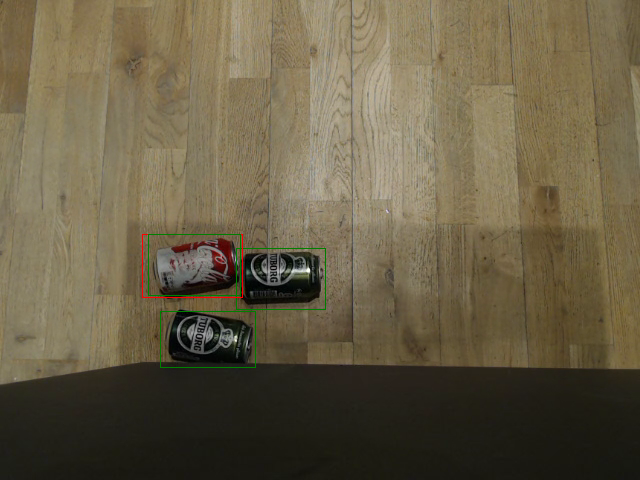

In [11]:
predicted_img